In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# !rm -r /content/Train_Small

# !rm /content/Test_Small2 (1).zip

# !rm /content/Train_Small (1).zip



from google.colab import files
uploaded = files.upload()

if(os.path.exists('/content/Train_Small') == False):
  ! unzip '/content/Train_Small.zip'

# datasets
# dtf = pd.read_csv('ModelNet10_Split.csv')

# Retreiving trainging dataset from CSV
# dtf_train, dtf_test = dtf[dtf['split'] == 'train'], dtf[dtf['split'] == 'test']


# folders paths

data_dir = "/content/Train_Small"

batch_size = 32
img_height = 240
img_width = 300

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


# class_names = ['bathtub_0',
#                'bed_0',
#                'chair_0',
#                'desk_0',
#                'dresser_0',
#                'monitor_0',
#                'night_0',
#                'sofa_0',
#                'table_0',
#                'toilet_0'
#                ]
class_names = ['bathtub_0',
               'bed_0',
               'chair_0',
               'desk_0',
               'dresser_0',
               'monitor_0',
               'night_0',
               'sofa_0',
               'table_0',
               'toilet_0',
               'bathtub_1',
               'bed_1',
               'chair_1',
               'desk_1',
               'dresser_1',
               'monitor_1',
               'night_1',
               'sofa_1',
               'table_1',
               'toilet_1',
               'bathtub_2',
               'bed_2',
               'chair_2',
               'desk_2',
               'dresser_2',
               'monitor_2',
               'night_2',
               'sofa_2',
               'table_2',
               'toilet_2',
               'bathtub_3',
               'bed_3',
               'chair_3',
               'desk_3',
               'dresser_3',
               'monitor_3',
               'night_3',
               'sofa_3',
               'table_3',
               'toilet_3',
               'bathtub_4',
               'bed_4',
               'chair_4',
               'desk_4',
               'dresser_4',
               'monitor_4',
               'night_4',
               'sofa_4',
               'table_4',
               'toilet_4'
               ]

train_ds.class_names = class_names
print(train_ds.class_names)





Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/Train_Small/sofa_3/._sofa_0002_3.png  
  inflating: Train_Small/chair_2/chair_0101_2.png  
  inflating: __MACOSX/Train_Small/chair_2/._chair_0101_2.png  
  inflating: Train_Small/chair_2/chair_0059_2.png  
  inflating: __MACOSX/Train_Small/chair_2/._chair_0059_2.png  
  inflating: Train_Small/chair_2/chair_0099_2.png  
  inflating: __MACOSX/Train_Small/chair_2/._chair_0099_2.png  
  inflating: Train_Small/chair_2/chair_0021_2.png  
  inflating: __MACOSX/Train_Small/chair_2/._chair_0021_2.png  
  inflating: Train_Small/chair_2/chair_0064_2.png  
  inflating: __MACOSX/Train_Small/chair_2/._chair_0064_2.png  
  inflating: Train_Small/chair_2/chair_0005_2.png  
  inflating: __MACOSX/Train_Small/chair_2/._chair_0005_2.png  
  inflating: Train_Small/chair_2/chair_0040_2.png  
  inflating: __MACOSX/Train_Small/chair_2/._chair_0040_2.png  
  inflating: Train_Small/chair_2/chair_0118_2.png  
  inflating: __MACOSX/Train_Sma

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.28235295 1.0


In [ ]:
num_classes = len(class_names)
data_augmentation = keras.Sequential(
  [
    #layers.RandomFlip("horizontal",
                      # input_shape=(img_height,
                      #             img_width,
                      #             3)),
    layers.RandomRotation(0.001),
    layers.RandomZoom(0.1),
  ]
)
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

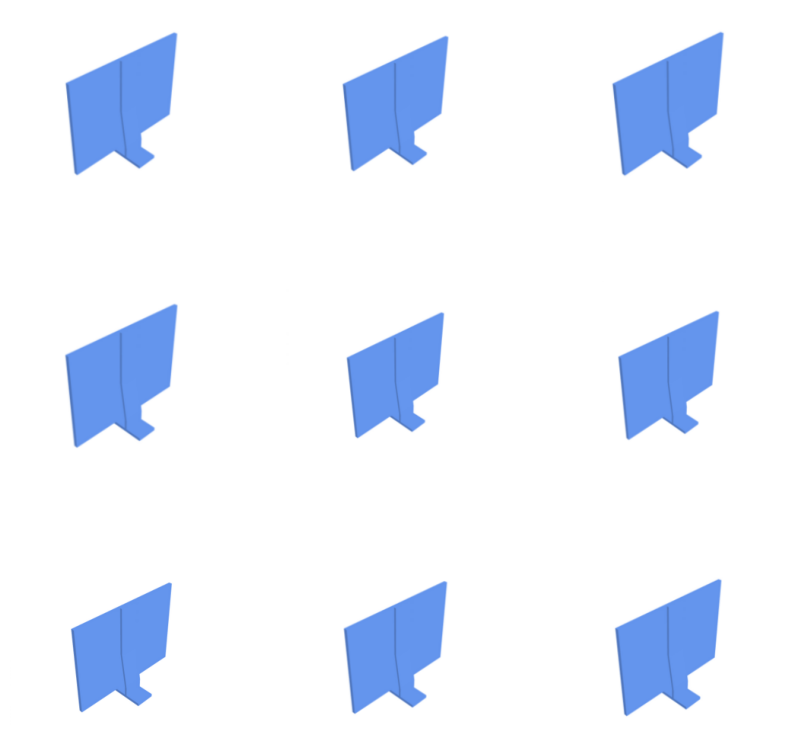

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
156/156 [==============================] - 535s 3s/step - loss: 3.4104 - accuracy: 0.1644 - val_loss: 1.9827 - val_accuracy: 0.4621
Epoch 2/10
156/156 [==============================] - 523s 3s/step - loss: 1.6636 - accuracy: 0.5379 - val_loss: 1.4913 - val_accuracy: 0.5766
Epoch 3/10
156/156 [==============================] - 532s 3s/step - loss: 1.3369 - accuracy: 0.6161 - val_loss: 1.2683 - val_accuracy: 0.6419
Epoch 4/10
156/156 [==============================] - 537s 3s/step - loss: 1.1368 - accuracy: 0.6634 - val_loss: 1.2149 - val_accuracy: 0.6419
Epoch 5/10
156/156 [==============================] - 525s 3s/step - loss: 1.0539 - accuracy: 0.6850 - val_loss: 1.1540 - val_accuracy: 0.6524
Epoch 6/10
156/156 [==============================] - 542s 3s/step - loss: 0.9250 - accuracy: 0.7106 - val_loss: 1.1582 - val_accuracy: 0.6548
Epoch 7/10
156/156 [==============================] - 540s 3s/step - loss: 0.8415 - accuracy: 0.7400 - val_loss: 1.0553 - val_accuracy: 0.6895

In [ ]:

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
156/156 [==============================] - 471s 3s/step - loss: 2.9590 - accuracy: 0.2574 - val_loss: 1.7400 - val_accuracy: 0.5315
Epoch 2/5
156/156 [==============================] - 469s 3s/step - loss: 1.3061 - accuracy: 0.6249 - val_loss: 1.3315 - val_accuracy: 0.6161
Epoch 3/5
156/156 [==============================] - 474s 3s/step - loss: 0.9002 - accuracy: 0.7271 - val_loss: 1.2421 - val_accuracy: 0.6581
Epoch 4/5
156/156 [==============================] - 466s 3s/step - loss: 0.6007 - accuracy: 0.8094 - val_loss: 1.1094 - val_accuracy: 0.6718
Epoch 5/5
156/156 [==============================] - 472s 3s/step - loss: 0.4213 - accuracy: 0.8636 - val_loss: 1.3265 - val_accuracy: 0.6790


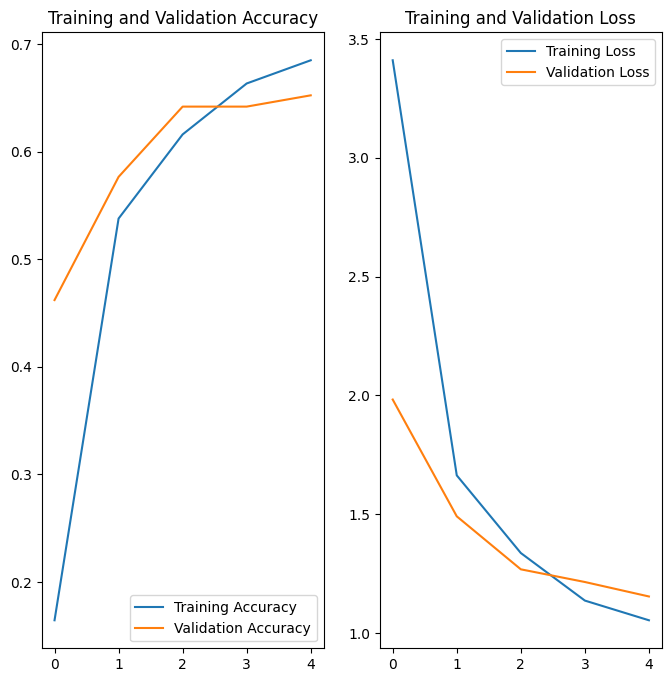

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc[:5], label='Training Accuracy')
plt.plot(epochs_range, val_acc[:5], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss[:5], label='Training Loss')
plt.plot(epochs_range, val_loss[:5], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('Train_Model')
!zip /content/Train__Model.zip /content/Train_Model

  adding: content/Train_Model/ (stored 0%)


In [ ]:
# sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)


from google.colab import files
uploaded = files.upload()
import os

train_ds.class_names = class_names

if(os.path.exists('/content/Test30_Small') == False):
  ! unzip '/content/Test30_Small.zip'
path = '/content/Test30_Small'

total_num = [0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
             0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
             0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
             0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
             0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
             0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
             0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
             0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
             0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
             0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
             0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0]
accuracy_score = [0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
                  0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
                  0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
                  0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
                  0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
                  0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
                  0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
                  0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
                  0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
                  0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0,
                  0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0]
counter = 0

for dir in os.listdir(path):
  if (dir != '.DS_Store'):
    for file in os.listdir(os.path.join(path, dir)):

      if (file != '.DS_Store'):

        print(os.path.join(path, dir, file))
        img = tf.keras.utils.load_img(
            os.path.join(path, dir, file), target_size=(img_height, img_width)
        )

        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        accuracy_score[counter] += 100*np.max(score)
        # print(accuracy_score)
        total_num[counter] += 1
    counter +=1


# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )
class_names = ['bathtub',
               'bed',
               'chair',
               'desk',
               'dresser',
               'monitor',
               'night',
               'sofa',
               'table',
               'toilet'
               ]
index = 0
for c in class_names:
  for i in range(0,5):
    print(c + "_" + str(i) + ": " + str(accuracy_score[index + i]/total_num[index + i]))
  index += 5
# print("Bathtub_0 accuracy: " + str(accuracy_score[0]/total_num[0]))
# print("Bed_0 accuracy: " + str(accuracy_score[1]/total_num[1]))
# print("Chair_0 accuracy: " + str(accuracy_score[2]/total_num[2]))
# print("Desk_0 accuracy: " + str(accuracy_score[3]/total_num[3]))
# print("Dresser_0 accuracy: " + str(accuracy_score[4]/total_num[4]))
# print("Monitor_0 accuracy: " + str(accuracy_score[5]/total_num[5]))
# print("Night_0 accuracy: " + str(accuracy_score[6]/total_num[6]))
# print("Sofa_0 accuracy: " + str(accuracy_score[7]/total_num[7]))
# print("Table_0 accuracy: " + str(accuracy_score[8]/total_num[8]))
# print("Toilet_0 accuracy: " + str(accuracy_score[9]/total_num[9]))
print(np.sum(accuracy_score)/np.sum(total_num))

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/Test30_Small/table_1/._table_0421_1.png  
  inflating: Test30_Small/table_1/table_0425_1.png  
  inflating: __MACOSX/Test30_Small/table_1/._table_0425_1.png  
  inflating: Test30_Small/table_1/table_0418_1.png  
  inflating: __MACOSX/Test30_Small/table_1/._table_0418_1.png  
  inflating: Test30_Small/table_1/table_0394_1.png  
  inflating: __MACOSX/Test30_Small/table_1/._table_0394_1.png  
  inflating: Test30_Small/table_1/table_0401_1.png  
  inflating: __MACOSX/Test30_Small/table_1/._table_0401_1.png  
  inflating: Test30_Small/table_1/table_0403_1.png  
  inflating: __MACOSX/Test30_Small/table_1/._table_0403_1.png  
  inflating: Test30_Small/table_1/table_0396_1.png  
  inflating: __MACOSX/Test30_Small/table_1/._table_0396_1.png  
  inflating: Test30_Small/table_1/table_0416_1.png  
  inflating: __MACOSX/Test30_Small/table_1/._table_0416_1.png  
  inflating: Test30_Small/table_1/table_0398_1.png  
  inflating: 